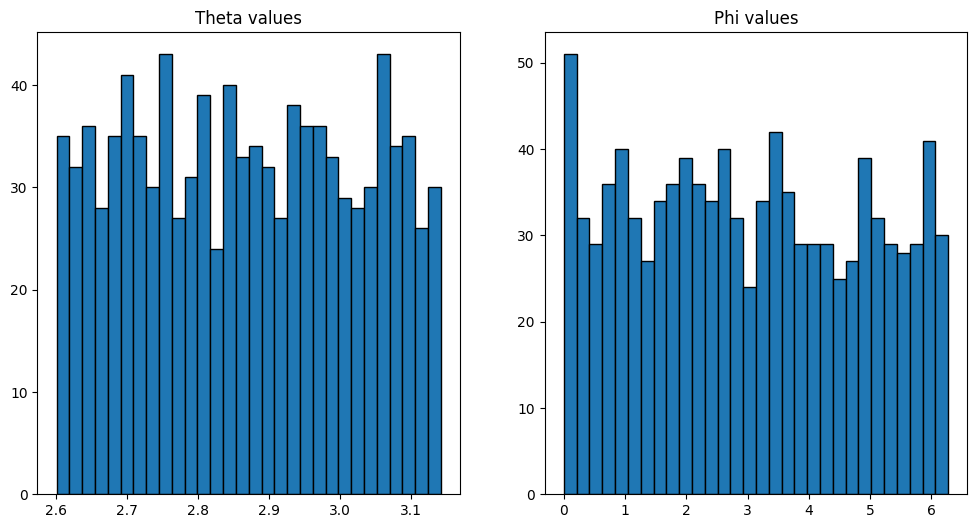

In [2]:
import math
import random

h = 5
r = 3
thetaMin = math.pi - math.atan(r / h)
thetaMax = math.pi

import matplotlib.pyplot as plt
import numpy as np

# 生成一大堆随机数
num_samples = 1000
theta_values = np.random.uniform(thetaMin, thetaMax, num_samples)
phi_values = np.random.uniform(0, 2*np.pi, num_samples)

# 计算方向
directions = np.array([np.sin(theta_values) * np.cos(phi_values), 
                       np.sin(theta_values) * np.sin(phi_values), 
                       np.cos(theta_values)]).T

# 绘制 theta 和 phi 的直方图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(theta_values, bins=30, edgecolor='black')
plt.title('Theta values')

plt.subplot(1, 2, 2)
plt.hist(phi_values, bins=30, edgecolor='black')
plt.title('Phi values')

plt.show()

In [11]:
import os
import re

def extract_variables(config_file):
    with open(config_file, 'r') as file:
        content = file.read()
    variable_pattern = re.compile(r'\b(?:inline\s+)?(?:G4double|G4ThreeVector|G4Material\*|int|float|double|char\*|G4String)\s+(\w+)\s*=')
    variables = variable_pattern.findall(content)
    return {var: f'g_{var}' for var in variables}

def find_and_replace_files(start_path, replace_dict, mode):
    files_to_replace = []
    for root, dirs, files in os.walk(start_path):
        for file in files:
            if file.endswith('.cc') or file.endswith('.hh'):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    file_content = f.readlines()
                
                modified_content = []
                file_modified = False
                for i, line in enumerate(file_content):
                    original_line = line
                    for old_var, new_var in replace_dict.items():
                        line = re.sub(rf'\b{old_var}\b', new_var, line)
                    if line != original_line:
                        file_modified = True
                    modified_content.append(line)
                
                if file_modified:
                    files_to_replace.append(file_path)
                    print(f"文件: {file_path}")
                    print("替换内容:")
                    for i, (old_line, new_line) in enumerate(zip(file_content, modified_content)):
                        if old_line != new_line:
                            print(f"  行 {i + 1}: {old_line.strip()} -> {new_line.strip()}")
                    print()
                    
                    if mode == 2:
                        with open(file_path, 'w') as f:
                            f.writelines(modified_content)
    return files_to_replace

config_file = '../include/config.hh'
start_path = '../'
mode = 2 #int(input("请输入模式 (1: 仅打印替换信息, 2: 执行替换): "))
replace_dict = extract_variables(config_file)
files_to_replace = find_and_replace_files(start_path, replace_dict, mode)
print("需要替换的文件列表:")
for file in files_to_replace:
    print(file)

文件: ../src/LightCollectionDetectorConstruction.cc
替换内容:
  行 59: G4Box* s_world = new G4Box("World", 0.5*worldX, 0.5*worldY, 0.5*worldZ); -> G4Box* s_world = new G4Box("World", 0.5*g_worldX, 0.5*g_worldY, 0.5*g_worldZ);
  行 60: G4LogicalVolume* l_world = new G4LogicalVolume(s_world, world_material, "World"); -> G4LogicalVolume* l_world = new G4LogicalVolume(s_world, g_world_material, "World");
  行 65: G4Box* s_shield = new G4Box("shield",0.5*shieldX, 0.5*shieldY, 0.5*shield_thickness); -> G4Box* s_shield = new G4Box("shield",0.5*g_shieldX, 0.5*g_shieldY, 0.5*g_shield_thickness);
  行 66: G4LogicalVolume* l_shield = new G4LogicalVolume(s_shield, shield_material, "shield"); -> G4LogicalVolume* l_shield = new G4LogicalVolume(s_shield, g_shield_material, "shield");
  行 67: MyPhysicalVolume* p_shield = new MyPhysicalVolume(0, shield_pos, "shield", l_shield, p_world, false, checkOverlaps); -> MyPhysicalVolume* p_shield = new MyPhysicalVolume(0, g_shield_pos, "shield", l_shield, p_world, false,